# AMAZON SALES

## Solved by Ayush Rajendra Prasad

### Problem Statement
The provided dataset contains information about sales transactions on Amazon, including details such as order
ID, date, status, fulfilment method, sales channel, product category, size, quantity, amount, shipping details,
and more. The objective is to conduct a comprehensive analysis of the data and extract actionable insights to
support business decision-making.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('Amazon.csv',encoding='unicode_escape')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [7]:
df.drop(['New'],axis=1,inplace=True)

df.drop(['PendingS'],axis=1,inplace=True)

df.drop(['ship-country'],axis=1,inplace=True)

df.drop(['index'],axis=1,inplace=True)

df.drop(['currency'],axis=1,inplace=True)

df.drop(['ship-postal-code'],axis=1,inplace=True)

df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,NaN


In [8]:
#Spliting dates to months
df['Month']=df['Date'].str.split('-').str[0]


In [9]:
# Drop date as we will look into months and years is same as 2022 in all the datas

df.drop(['Date'],axis=1,inplace=True)
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by,Month
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,Easy Ship,04
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,Easy Ship,04
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,NaN,04
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship,04
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,NaN,04


In [10]:
# We will find Missing value

In [221]:
df.isnull().sum()

Order ID                  0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
Amount                 7800
ship-city                35
ship-state               35
B2B                       0
fulfilled-by          89713
Day                       0
Month                     0
Year                      0
dtype: int64

In [11]:
df['Amount']=df['Amount'].fillna(df['Amount'].mean())

df['ship-city']=df['ship-city'].fillna(df['ship-city'].mode()[0])

df['ship-state']=df['ship-state'].fillna(df['ship-state'].mode()[0])

In [12]:
df.isnull().sum()

Order ID                  0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
Amount                    0
ship-city                 0
ship-state                0
B2B                       0
fulfilled-by          89713
Month                     0
dtype: int64

In [42]:
# "fulfilled-by" has numbers of missing values So, we drop it

In [13]:
df.drop(['fulfilled-by'],axis=1,inplace=True)
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,Month
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,04
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,04
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,04
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,04
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,04


In [15]:
# Sort status

In [14]:
df['Status']= df['Status'].str.split(' ').str[0]

In [16]:
#months name

In [17]:
df['Month']= df['Month'].map({'03':'March','04':'April','05':'May','06':'June'})

In [18]:
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,Month
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,April
1,171-9198151-1101146,Shipped,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,April
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,April
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,April
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,April


# 1. Sales Overview:

In [20]:
df2 = df.groupby(["Sales Channel","Month"]).Amount.sum().reset_index()

In [22]:
overview = df.groupby('Month').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()
overview.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)

In [24]:
overview.head(10)

,Month,Amount,Number of Orders
0,April,3.078448e+07,49068
1,June,2.490648e+07,37697
2,March,1.075209e+05,171
3,May,2.785048e+07,42040


In [26]:
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
               'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
overview['MonthOrder'] = overview['Month'].map(month_order)
df_sorted = overview.sort_values('MonthOrder').drop('MonthOrder', axis=1)
df_sorted.reset_index(drop=True, inplace=True)




In [27]:
df_sorted.head()

,Month,Amount,Number of Orders
0,March,1.075209e+05,171
1,April,3.078448e+07,49068
2,May,2.785048e+07,42040
3,June,2.490648e+07,37697


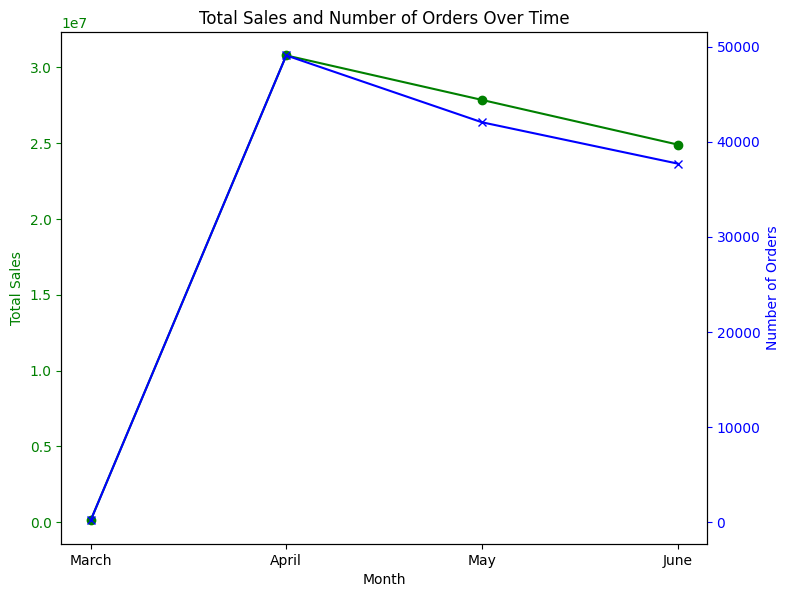

In [28]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(df_sorted['Month'], df_sorted['Amount'], color='g', marker='o', label='Total Sales')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
ax2.plot(df_sorted['Month'], df_sorted['Number of Orders'], color='b', marker='x', label='Number of Orders')
ax2.set_ylabel('Number of Orders', color='b')
ax2.tick_params('y', colors='b')

fig.tight_layout()
plt.title('Total Sales and Number of Orders Over Time')
plt.show()

Text(0, 0.5, 'Amount')

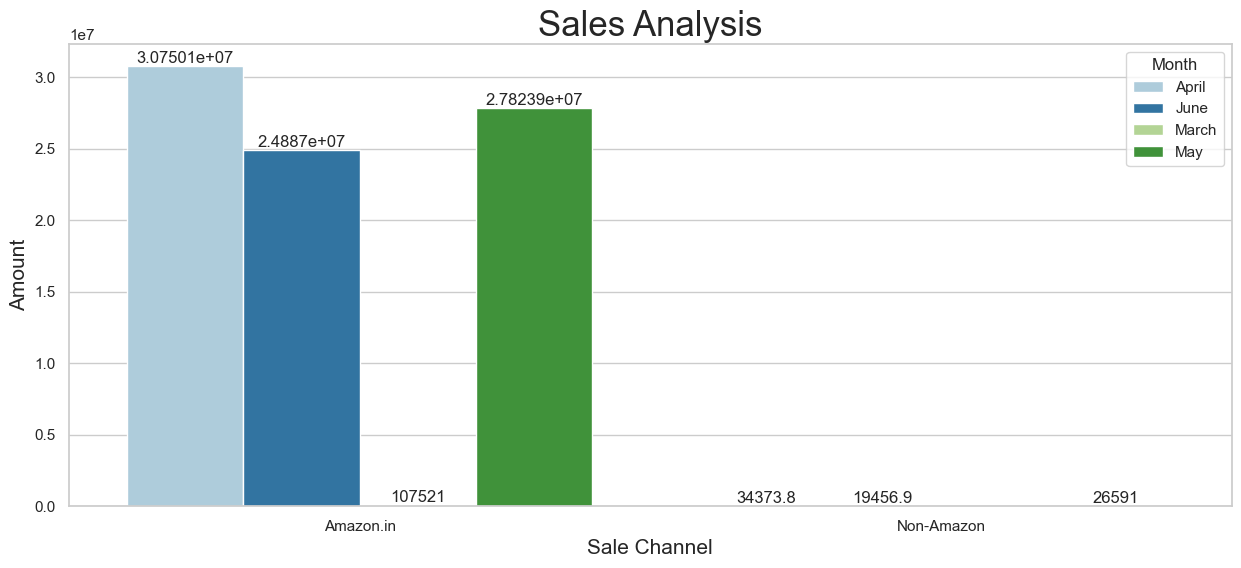

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

ax=sns.barplot(x='Sales Channel',y='Amount',hue="Month",data=df2,width=0.8,palette='Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Sales Analysis", fontsize=25)
plt.xlabel('Sale Channel', fontsize=15)
plt.ylabel('Amount', fontsize=15)

## Observation
Maximum sales recorded through the sales channel "Amazon.in" occurred in the following order: April, followed by May, June, and then March.

Maximum sales recorded through the "Non-Amazon" sales channel followed a similar trend: April, followed by May and then June.



# 2. Product Analysis:

In [32]:
df3 = df.groupby(["Category","Size","Qty"]).size().reset_index().rename(columns={0:'QtyCount'})

In [33]:
df3.head(10)

,Category,Size,Qty,QtyCount
0,Blazzer,3XL,0,160
1,Blazzer,3XL,1,1748
2,Blazzer,3XL,2,5
3,Blazzer,L,0,304
4,Blazzer,L,1,2535
5,Blazzer,L,2,5
6,Blazzer,M,0,272
7,Blazzer,M,1,2308
8,Blazzer,M,2,5
9,Blazzer,M,3,3


In [34]:
df3 = df3[(df3[['Qty']] != 0).all(axis=1)]

In [36]:
df3.head(10)

,Category,Size,Qty,QtyCount
1,Blazzer,3XL,1,1748
2,Blazzer,3XL,2,5
4,Blazzer,L,1,2535
5,Blazzer,L,2,5
7,Blazzer,M,1,2308
8,Blazzer,M,2,5
9,Blazzer,M,3,3
11,Blazzer,S,1,1947
12,Blazzer,S,2,8
14,Blazzer,XL,1,2116


In [37]:
df1 = df3.groupby(["Category","Size"]).QtyCount.sum().reset_index()

In [38]:
df1.tail()

,Category,Size,QtyCount
40,Trousers,XL,1730
41,Trousers,XS,868
42,Trousers,XXL,1679
43,Wallet,Free,841
44,Watch,Free,3


Text(0, 0.5, 'QtyCount')

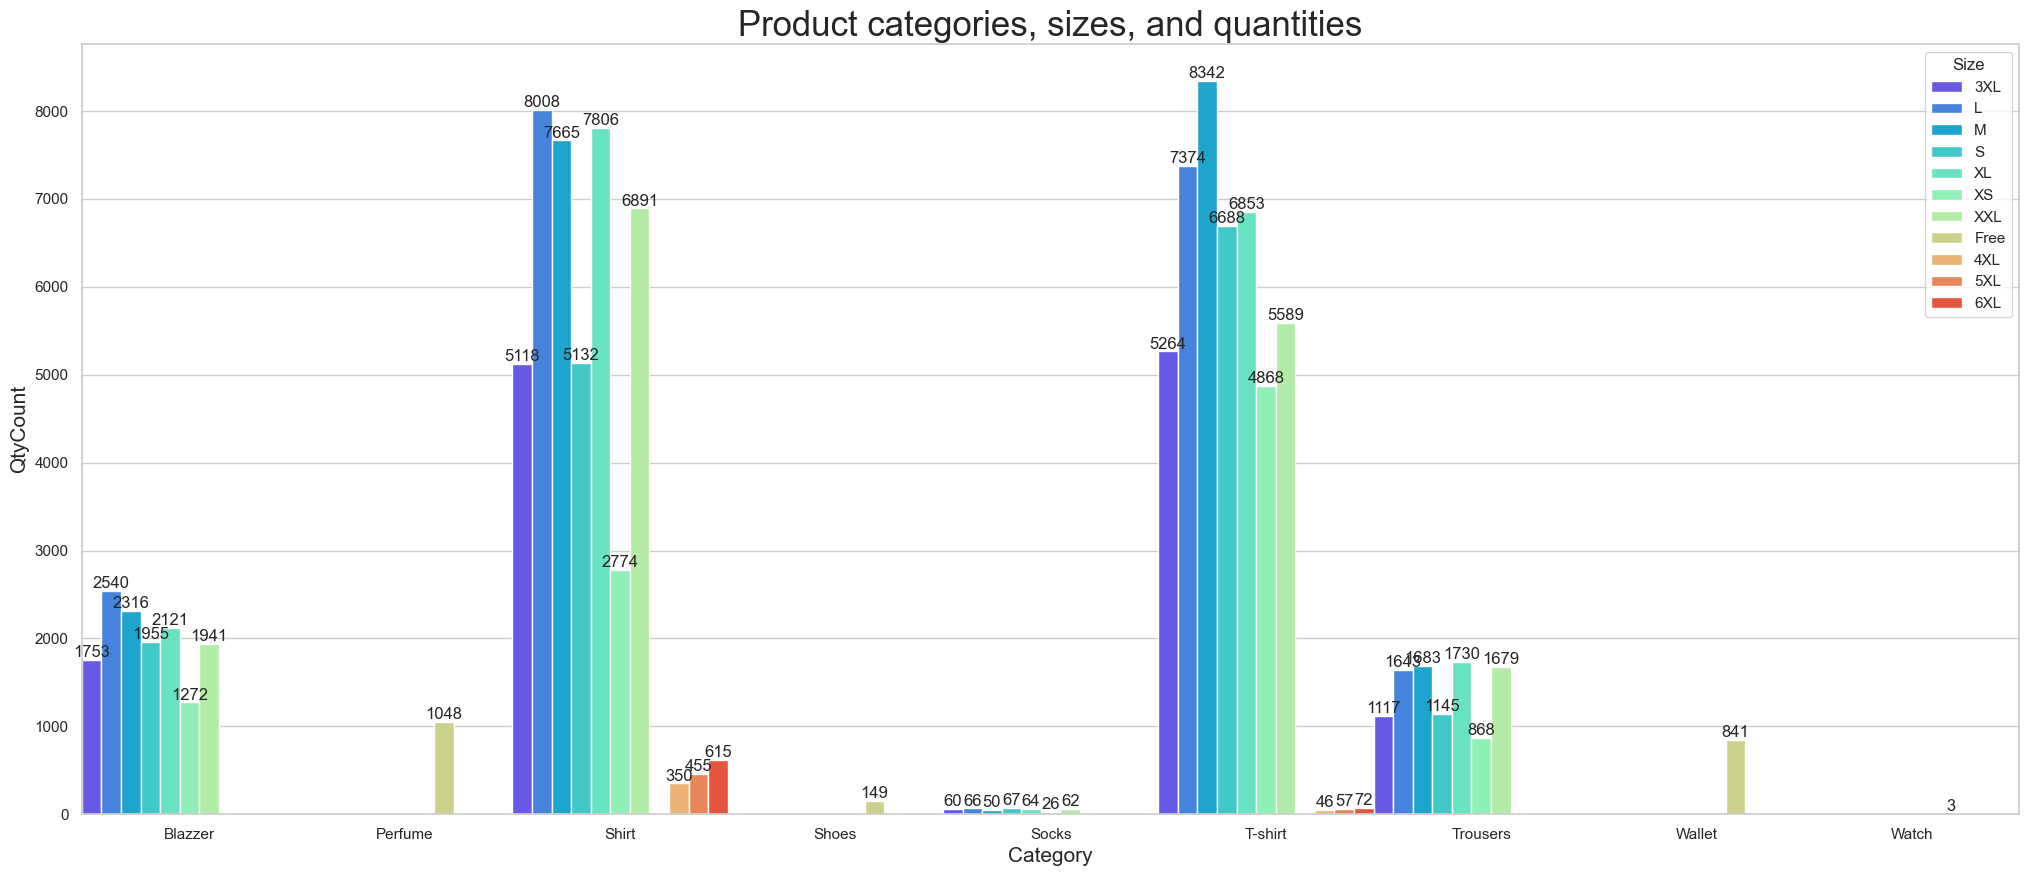

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(25, 10))
plt.title("Product categories, sizes, and quantities",fontsize=25)
ax=sns.barplot(x='Category',y='QtyCount',hue="Size",data=df1,width=1,palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Category', fontsize=15)
plt.ylabel('QtyCount', fontsize=15)

In [40]:
df4 = df3.groupby(["Category"]).QtyCount.sum().reset_index()

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_7302/1404342067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Category',y='QtyCount',data=sort,width=0.9,palette='rainbow')


Text(0, 0.5, 'QtyCount')

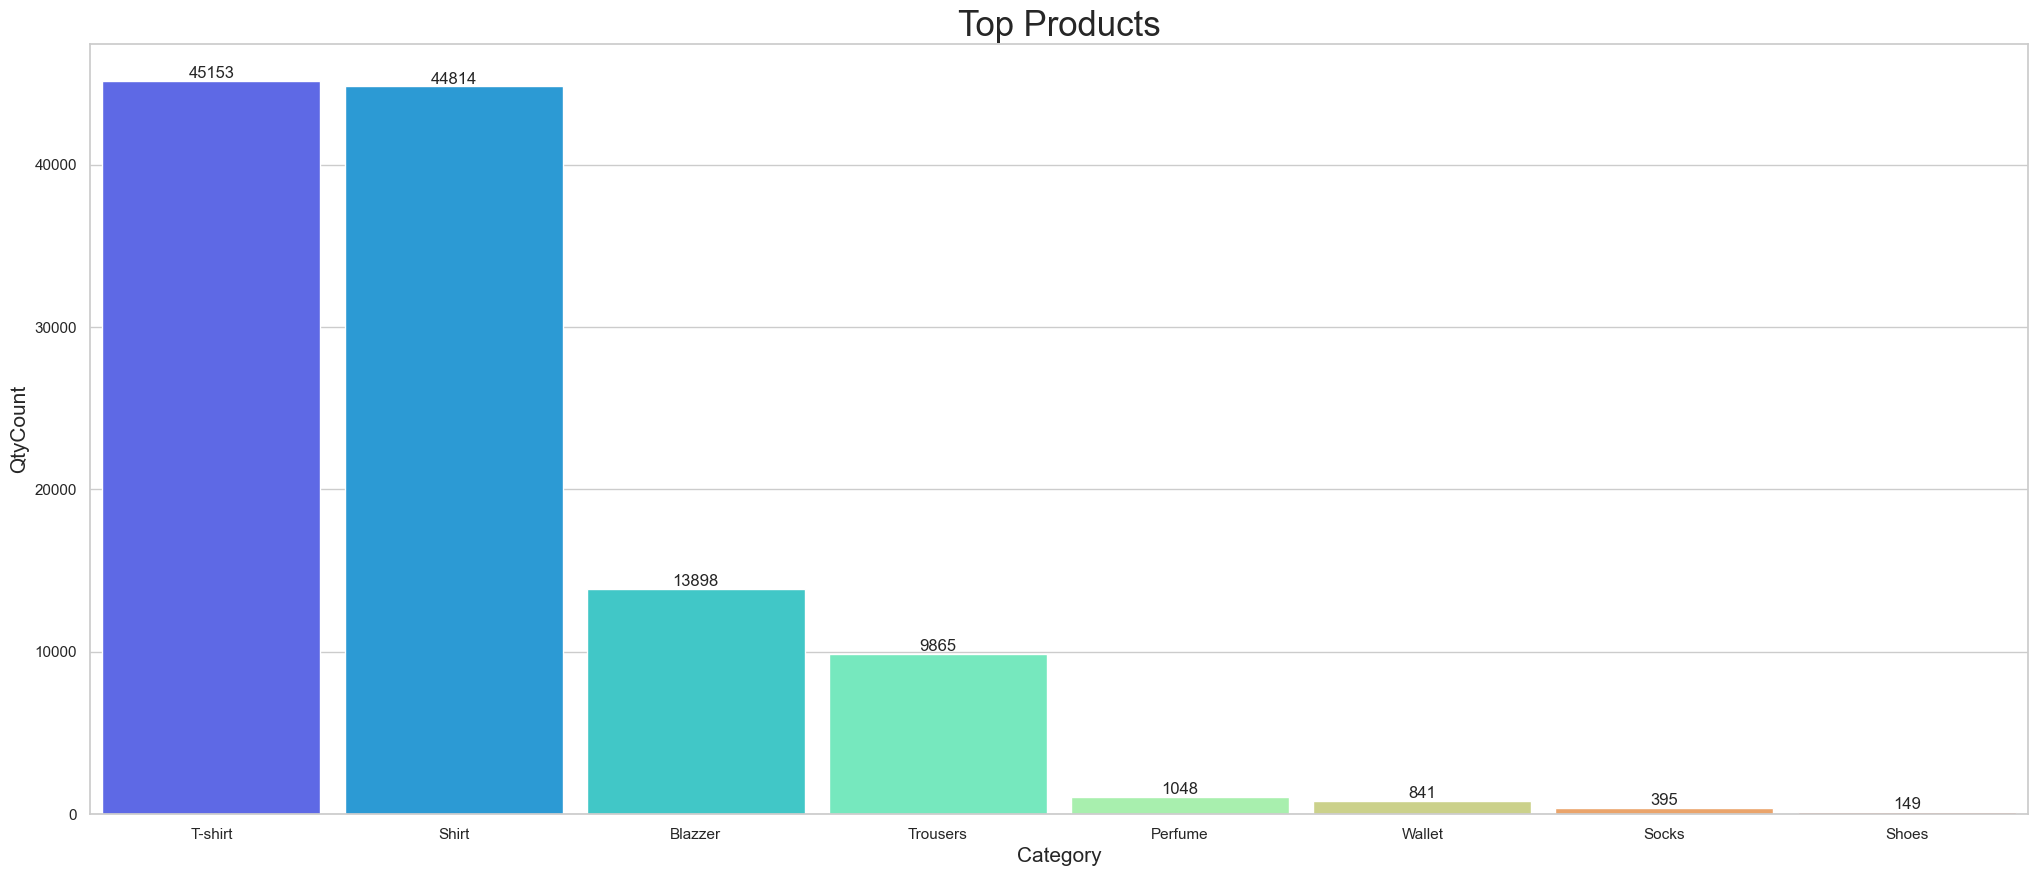

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(25, 10))
plt.title("Top Products",fontsize=25)
sort = df4.sort_values('QtyCount', ascending=False).head(8)
ax=sns.barplot(x='Category',y='QtyCount',data=sort,width=0.9,palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Category', fontsize=15)
plt.ylabel('QtyCount', fontsize=15)

## Observation

1. The most popular product is T-shirts, specifically in size Medium (M).
   
2. Other popular products include shirts, blazers, and trousers.

# 3. Fulfillment Analysis:

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_7302/2259967048.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Status',data=df,width=0.8,palette='rainbow')


Text(0.5, 0, 'Status')

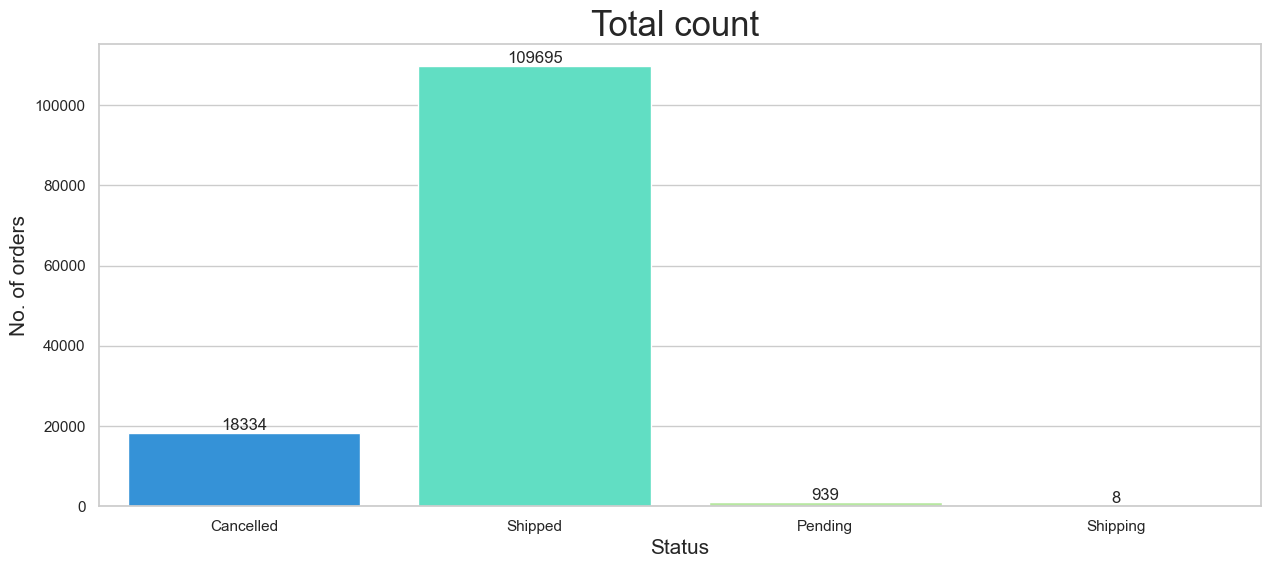

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
plt.title("Total count ",fontsize=25)

ax=sns.countplot(x='Status',data=df,width=0.8,palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('No. of orders', fontsize=15)
plt.xlabel('Status', fontsize=15)

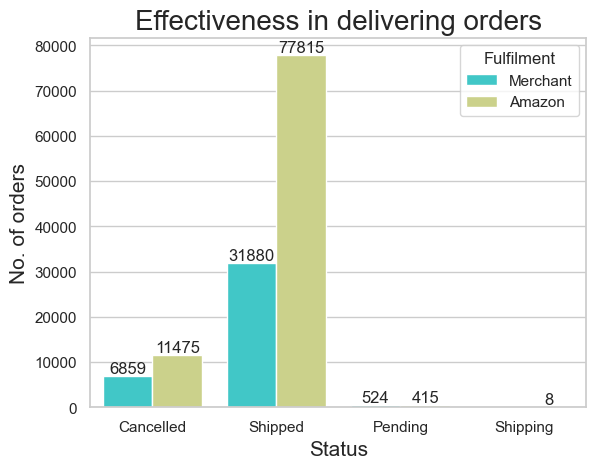

In [47]:
plt.title("Effectiveness in delivering orders",fontsize=20)
ax=sns.countplot(x='Status',hue='Fulfilment',data=df,gap=0,palette='rainbow')
plt.ylabel('No. of orders', fontsize=15)
plt.xlabel('Status', fontsize=15)
for container in ax.containers:
    ax.bar_label(container)

## Observation
Fulfillment on Amazon is managed through two primary methods: Fulfillment by Amazon (FBA) and Fulfillment by Merchant (FBM). Analyzing the data reveals that the majority of orders are predominantly fulfilled by Amazon through its FBA service.

# 4. Customer Segmentation:

In [314]:
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,Day,Month,Year
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,30,April,22
1,171-9198151-1101146,Shipped,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,30,April,22
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,30,April,22
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,30,April,22
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,30,April,22


In [ ]:
#Rows with o quantity items are removed

In [48]:
df_f = df[(df[['Qty']] != 0).all(axis=1)]

In [49]:
df_f.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,Month
1,171-9198151-1101146,Shipped,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,False,April
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,True,April
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.0,CHENNAI,TAMIL NADU,False,April
5,404-1490984-4578765,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,False,April
6,408-5748499-6859555,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,False,April


In [318]:
df_f.isnull().sum()

Order ID              0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
B2B                   0
Day                   0
Month                 0
Year                  0
dtype: int64

In [52]:
df_f['Sales Channel'].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [53]:
state_mapping = {'MAHARASHTRA': 'Maharashtra', 'KARNATAKA': 'Karnataka', 'PUDUCHERRY': 'Puducherry',
    'TAMIL NADU': 'Tamil Nadu', 'UTTAR PRADESH': 'Uttar Pradesh', 'CHANDIGARH': 'Chandigarh',
    'TELANGANA': 'Telangana', 'ANDHRA PRADESH': 'Andhra Pradesh', 'RAJASTHAN': 'Rajasthan',
    'DELHI': 'Delhi', 'HARYANA': 'Haryana', 'ASSAM': 'Assam', 'JHARKHAND': 'Jharkhand',
    'CHHATTISGARH': 'Chhattisgarh', 'ODISHA': 'Odisha', 'KERALA': 'Kerala',
    'MADHYA PRADESH': 'Madhya Pradesh', 'WEST BENGAL': 'West Bengal', 'NAGALAND': 'Nagaland',
    'Gujarat': 'Gujarat', 'UTTARAKHAND': 'Uttarakhand', 'BIHAR': 'Bihar',
    'JAMMU & KASHMIR': 'Jammu & Kashmir', 'PUNJAB': 'Punjab', 'HIMACHAL PRADESH': 'Himachal Pradesh',
    'ARUNACHAL PRADESH': 'Arunachal Pradesh', 'Goa': 'Goa', 'MEGHALAYA': 'Meghalaya',
    'GOA': 'Goa', 'MANIPUR': 'Manipur', 'TRIPURA': 'Tripura', 'LADAKH': 'Ladakh',
    'DADRA AND NAGAR': 'Dadra and Nagar Haveli and Daman and Diu', 'SIKKIM': 'Sikkim',
    'Delhi': 'Delhi', 'ANDAMAN & NICOBAR': 'Andaman & Nicobar Islands', 'Punjab': 'Punjab',
    'Rajshthan': 'Rajasthan', 'Manipur': 'Manipur', 'rajasthan': 'Rajasthan', 'Odisha': 'Odisha',
    'NL': 'Nagaland', 'Bihar': 'Bihar', 'MIZORAM': 'Mizoram', 'punjab': 'Punjab',
    'New Delhi': 'Delhi', 'Rajasthan': 'Rajasthan', 'Punjab/Mohali/Zirakpur': 'Punjab',
    'Puducherry': 'Puducherry', 'delhi': 'Delhi', 'RJ': 'Rajasthan', 'Chandigarh': 'Chandigarh',
    'orissa': 'Odisha', 'LAKSHADWEEP': 'Lakshadweep', 'goa': 'Goa', 'PB': 'Punjab',
    'APO': 'Andhra Pradesh', 'Arunachal Pradesh': 'Arunachal Pradesh', 'AR': 'Arunachal Pradesh',
    'Pondicherry': 'Puducherry', 'Sikkim': 'Sikkim', 'Arunachal pradesh': 'Arunachal Pradesh',
    'Nagaland': 'Nagaland', 'bihar': 'Bihar', 'Mizoram': 'Mizoram', 'rajsthan': 'Rajasthan',
    'Orissa': 'Odisha', 'Rajsthan': 'Rajasthan', 'Meghalaya': 'Meghalaya'
}


In [54]:
df_f['ship-state'] = df_f['ship-state'].map(state_mapping)

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_7302/3846070247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['ship-state'] = df_f['ship-state'].map(state_mapping)


In [242]:
#To study buying behaviour we will analysis order frequency on factors: city, state, category

In [55]:
df_f['Order ID'].duplicated().value_counts()

Order ID
False    108283
True       7883
Name: count, dtype: int64

In [245]:
# This tells all orders are not unique. There are repeat customer
#Now, we find order frequency

In [56]:
df_f['Customer ID'] = df_f['Order ID']

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_7302/2393497719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Customer ID'] = df_f['Order ID']


In [57]:
order_frequency = df_f.groupby('Customer ID')['Order ID'].count().reset_index()

In [58]:
order_frequency.columns = ['Customer ID', 'Order Frequency']

In [59]:
order_frequency.head()

,Customer ID,Order Frequency
0,171-0000547-8192359,1
1,171-0000902-4490745,1
2,171-0001409-6228339,1
3,171-0003082-5110755,1
4,171-0003738-2052324,1


In [60]:
order_frequency_state = df_f.groupby(['Customer ID', 'ship-state'])['Order ID'].count().reset_index()
order_frequency_state.columns = ['Customer ID', 'State', 'Order Frequency']

In [61]:
order_frequency_city = df_f.groupby(['Customer ID', 'ship-city'])['Order ID'].count().reset_index()
order_frequency_city.columns = ['Customer ID', 'City', 'Order Frequency']

In [62]:
state_order_frequency = order_frequency_state.groupby('State')['Order Frequency'].mean().reset_index()
state_order_frequency.columns = ['State', 'Average Order Frequency']

In [63]:
city_order_frequency = order_frequency_city.groupby('City')['Order Frequency'].mean().reset_index()
city_order_frequency.columns = ['City', 'Average Order Frequency']

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_7302/2451374961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Average Order Frequency', data=top_States,palette='rainbow')


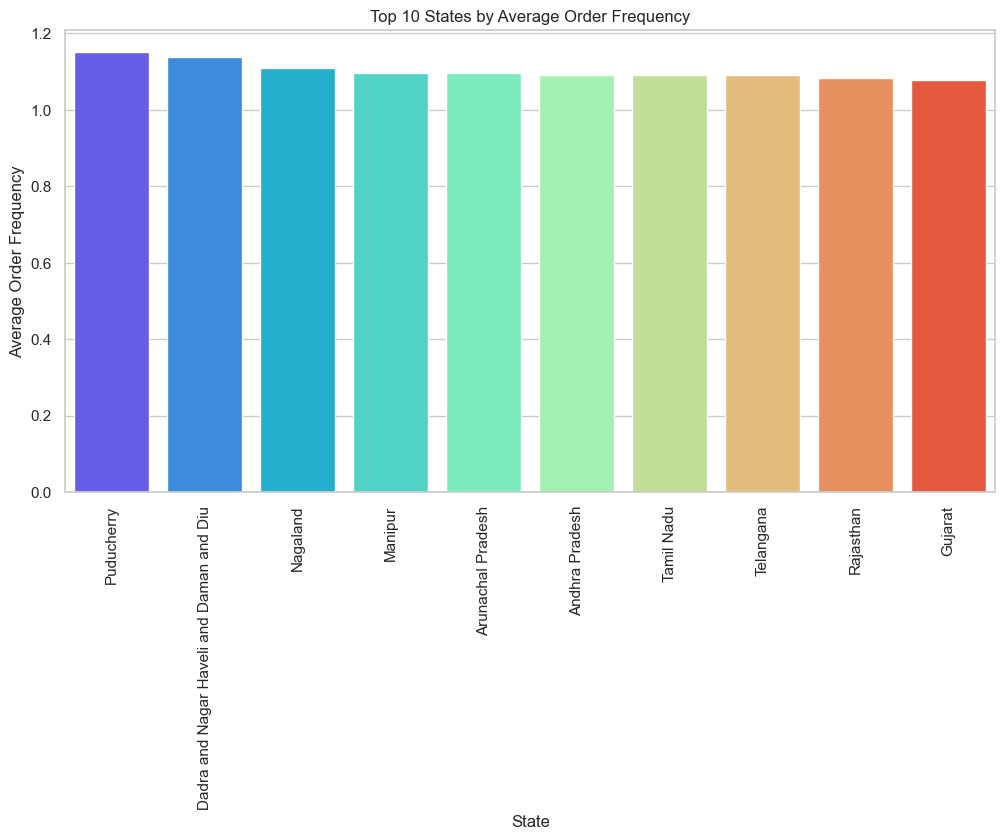

In [65]:
plt.figure(figsize=(12, 6))
top_States = state_order_frequency.sort_values('Average Order Frequency', ascending=False).head(10)
sns.barplot(x='State', y='Average Order Frequency', data=top_States,palette='rainbow')
plt.title('Top 10 States by Average Order Frequency')
plt.xticks(rotation=90)
plt.show()

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_7302/3216694158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Average Order Frequency', data=top_cities,palette='rainbow')


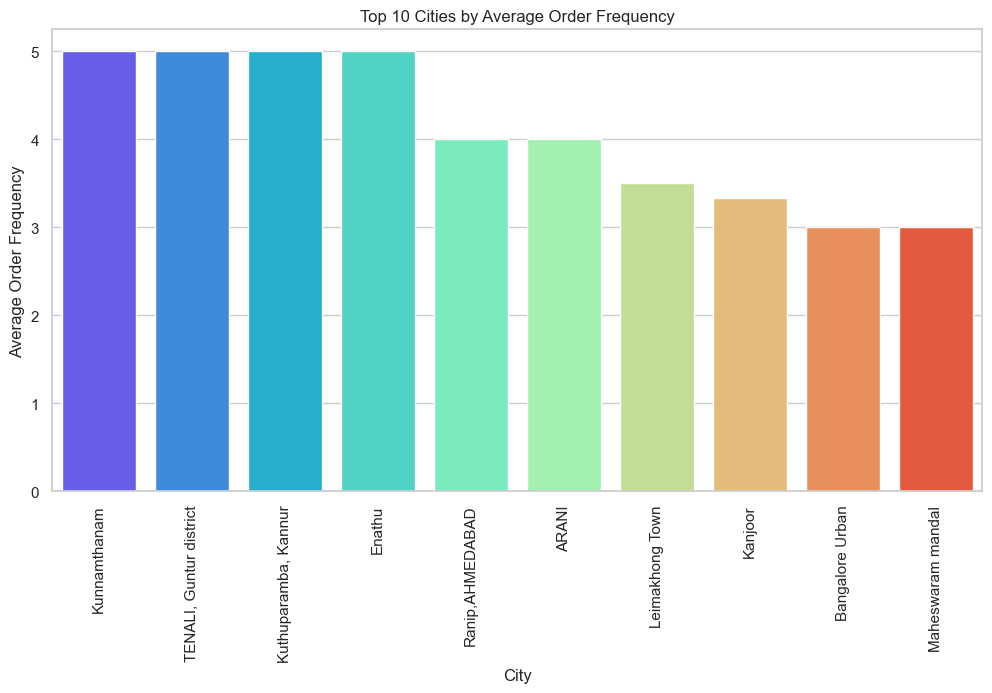

In [66]:
plt.figure(figsize=(12, 6))
top_cities = city_order_frequency.sort_values('Average Order Frequency', ascending=False).head(10)
sns.barplot(x='City', y='Average Order Frequency', data=top_cities,palette='rainbow')
plt.title('Top 10 Cities by Average Order Frequency')
plt.xticks(rotation=90)
plt.show()

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_7302/826784956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Order Frequency', data=top_cities,palette='rainbow')


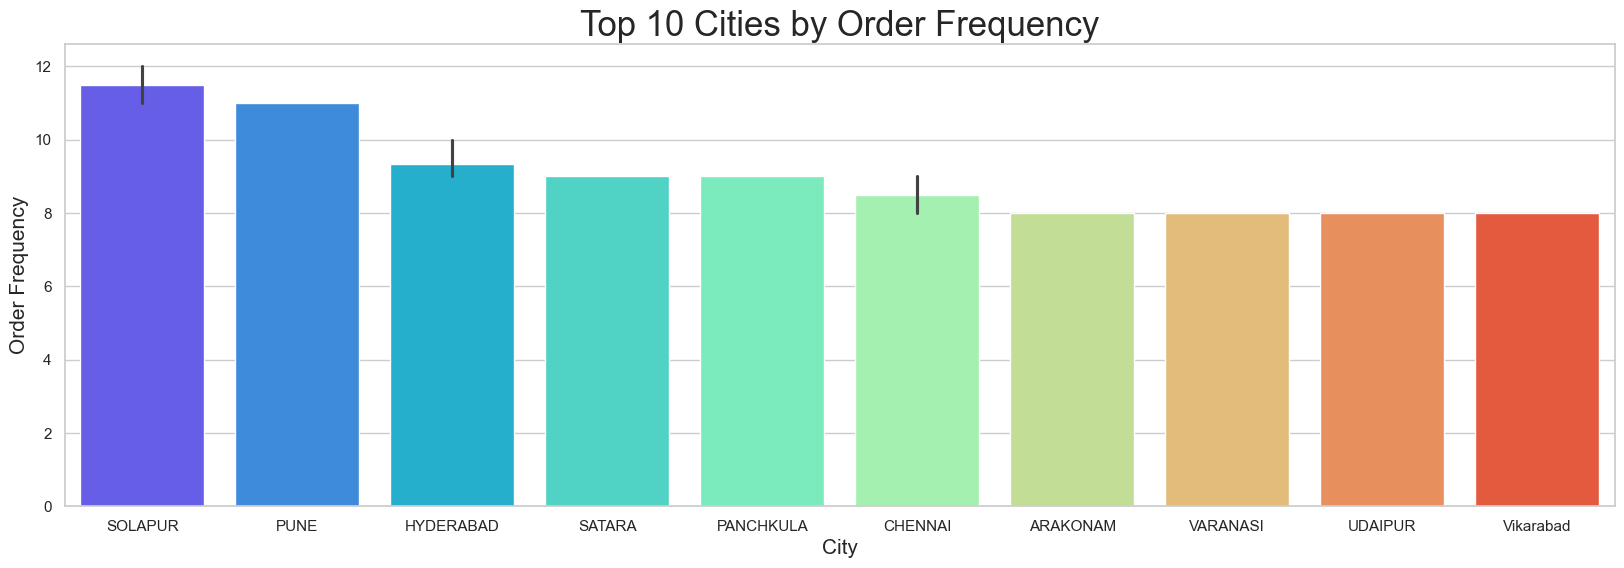

In [67]:
plt.figure(figsize=(20, 6))
top_cities = order_frequency_city.sort_values('Order Frequency', ascending=False).head(14)
sns.barplot(x='City', y='Order Frequency', data=top_cities,palette='rainbow')
plt.title('Top 10 Cities by Order Frequency',fontsize=25)
plt.xlabel('City', fontsize=15)
plt.ylabel('Order Frequency', fontsize=15)
plt.xticks(rotation=0)
plt.show()

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_7302/2073451710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Order Frequency', data=top_states,palette='rainbow')


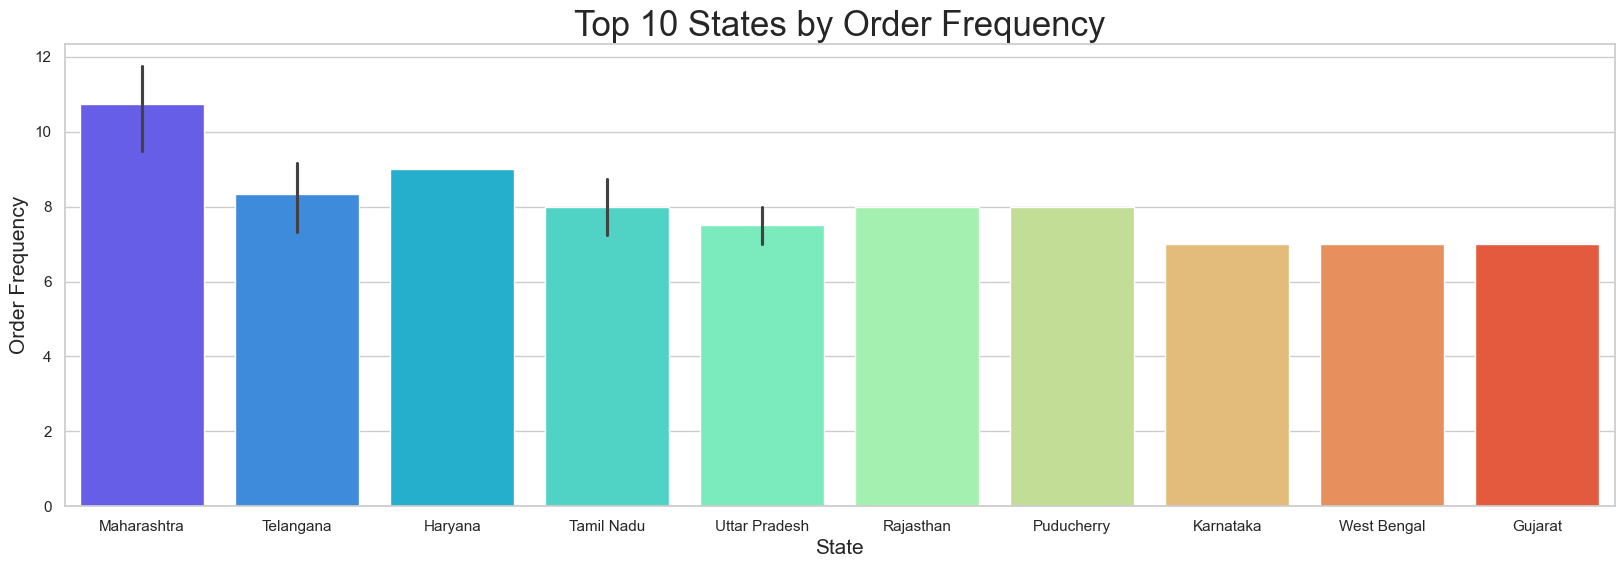

In [68]:
plt.figure(figsize=(20, 6))
top_states = order_frequency_state.sort_values('Order Frequency', ascending=False).head(24)
sns.barplot(x='State', y='Order Frequency', data=top_states,palette='rainbow')
plt.title('Top 10 States by Order Frequency',fontsize=25)
plt.xlabel('State', fontsize=15)
plt.ylabel('Order Frequency', fontsize=15)
plt.xticks(rotation=0)
plt.show()

### Observation
We have analyzed the order frequency using Order ID and examined its variation across different states and cities. This analysis provides valuable insights into geographic patterns in customer behavior, enabling us to optimize business strategies effectively. By understanding these regional trends, we can tailor our marketing efforts, inventory management, and customer service to better meet the needs of our diverse customer base, ultimately driving increased sales and customer satisfaction.

# 5. Geographical Analysis:
Explore the geographical distribution of sales, focusing on states and cities.

In [69]:
df_g = df_f.groupby(["ship-city","ship-state"]).Amount.sum().reset_index()

In [70]:
df_g.head()

,ship-city,ship-state,Amount
0,(Chikmagalur disterict). (N.R pur thaluku),Karnataka,389.0
1,"(Via Cuncolim)Quepem,South Goa",Goa,1163.0
2,",HYDERABAD",Telangana,563.0
3,",raibarely road faizabad (Ayodhya)",Uttar Pradesh,1122.0
4,..katra,Jammu & Kashmir,641.0


/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_7302/2341508611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='ship-state', y='Amount', data=top_states,palette='rainbow')


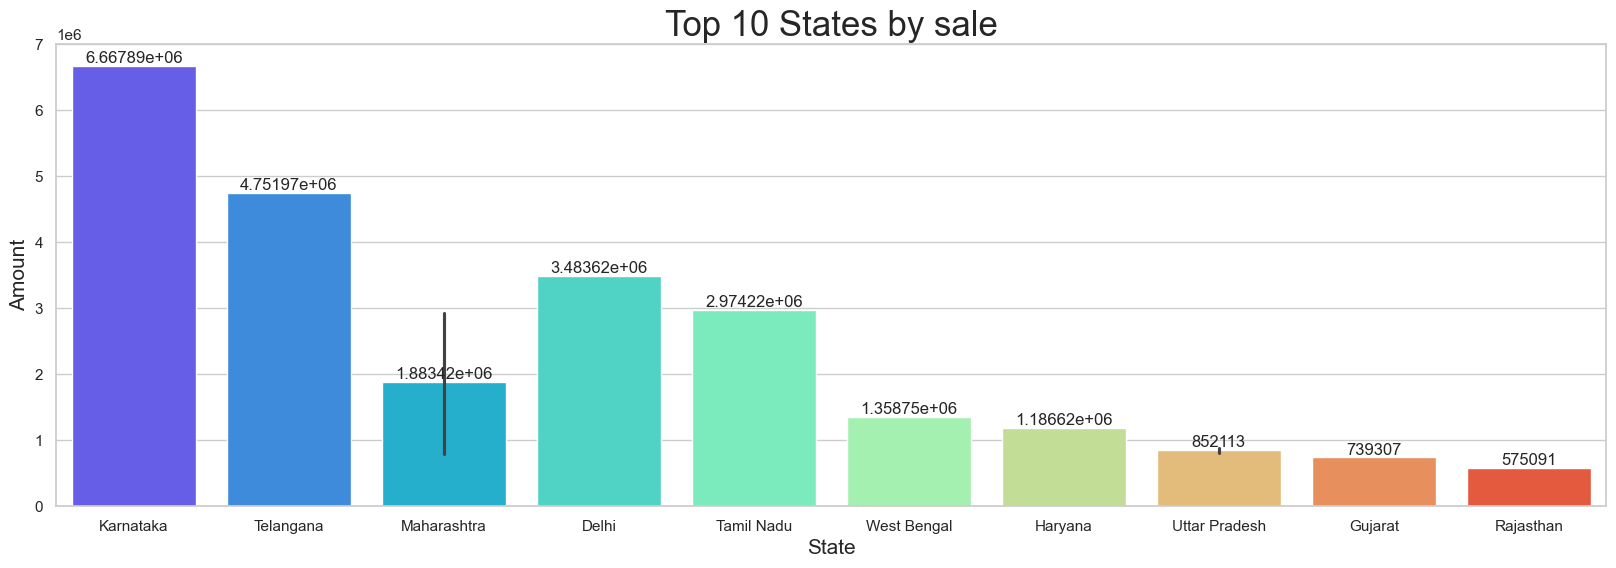

In [71]:
plt.figure(figsize=(20, 6))
top_states = df_g.sort_values('Amount', ascending=False).head(15)
ax=sns.barplot(x='ship-state', y='Amount', data=top_states,palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 States by sale',fontsize=25)
plt.xlabel('State', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.xticks(rotation=0)
plt.show()

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_7302/2535161071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='ship-city', y='Amount', data=top_city,palette='rainbow')


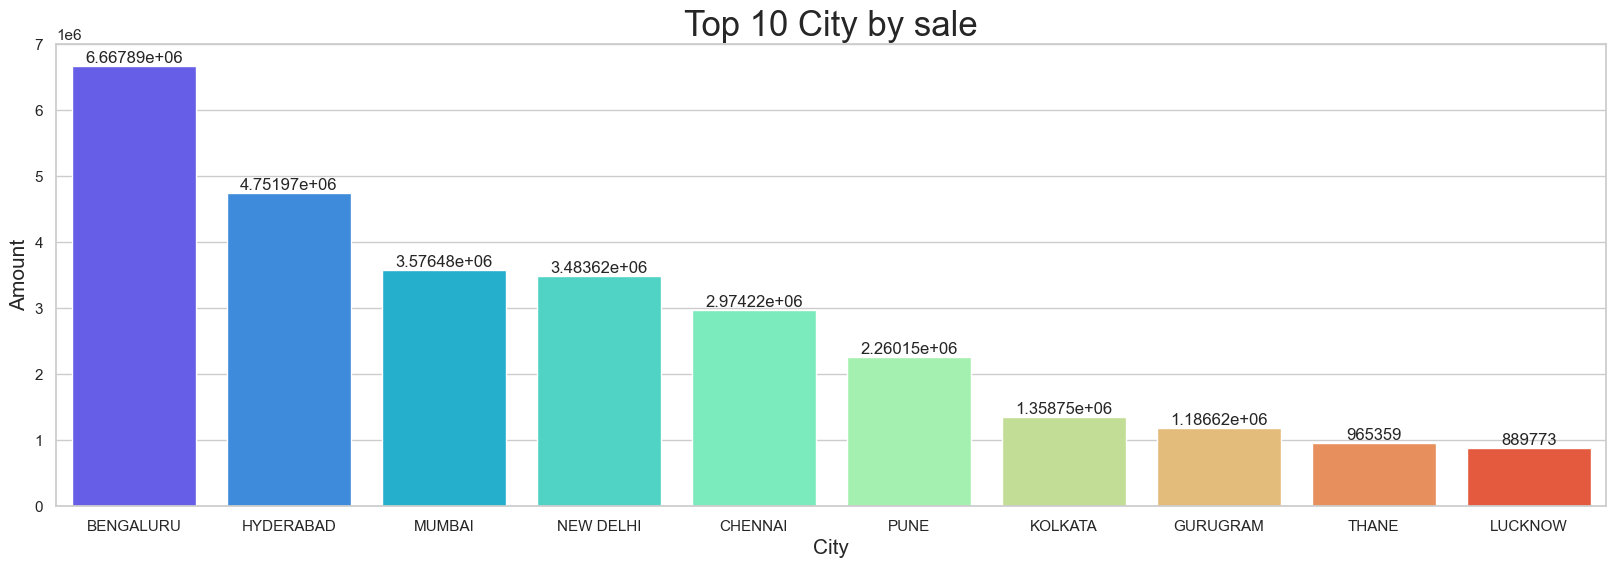

In [73]:
plt.figure(figsize=(20, 6))
top_city = df_g.sort_values('Amount', ascending=False).head(10)
ax=sns.barplot(x='ship-city', y='Amount', data=top_city,palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 City by sale',fontsize=25)
plt.xlabel('City', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.xticks(rotation=0)
plt.show()

# 6. Business Insights:
### Actionable Insights and Recommendations

## 1. Targeted Marketing Campaigns

### Insight: 
Certain cities and states exhibit higher order volumes.(# 4. Customer segmentation)
### Recommendation:
Concentrate marketing initiatives on these high-frequency regions. Customize promotional campaigns for these areas by providing special offers, discounts, or loyalty programs to boost repeat purchases and draw in new customers.

## 2.Personalized Customer Experience

### Insight:
Customers across various regions may exhibit distinct preferences and behaviors, as indicated in sections 4 (Customer Segmentation) and 5 (Geographical Analysis).

### Recommendation:
Leverage customer data to individualize the shopping journey. Integrate location-specific suggestions and customize communication to mirror regional tastes, festivities, and occasions.

## 3.Efficient Fulfillment Strategies

### Insight:
 Delivery times and customer satisfaction may be impacted by differences in fulfillment performance across locations, as highlighted in section 3 (Fulfillment Analysis).
 
### Recommendation:
Enhance fulfillment operations by strategically positioning warehouses and distribution centers in proximity to regions with high order frequency. This strategy will decrease delivery times and enhance customer satisfaction.

## 4.Regional Product Offerings

### Insight:
 Certain regions may show a higher preference for specific products.

### Recommendation:
Tailor product selections according to regional preferences. Introduce products or variations tailored to specific regions to address local preferences and boost sales.